In [1]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt


In [2]:
!wget -nc https://archive.org/download/lions_cheetahs/lions_cheetahs.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


File 'lions_cheetahs.zip' already there; not retrieving.



In [3]:
!unzip -nq lions_cheetahs.zip

In [4]:
!ls

images	lions_cheetahs.zip


In [5]:
!ls images

Cheetahs  Lions


In [6]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/working/images',
    image_size=(224, 224),
    validation_split=0.3,
    subset='both',
    batch_size=32,
    color_mode='rgb',
    seed=42
)

Found 200 files belonging to 2 classes.
Using 140 files for training.
Using 60 files for validation.


In [7]:
train_data= train_data.shuffle(10 * 32, reshuffle_each_iteration=True)


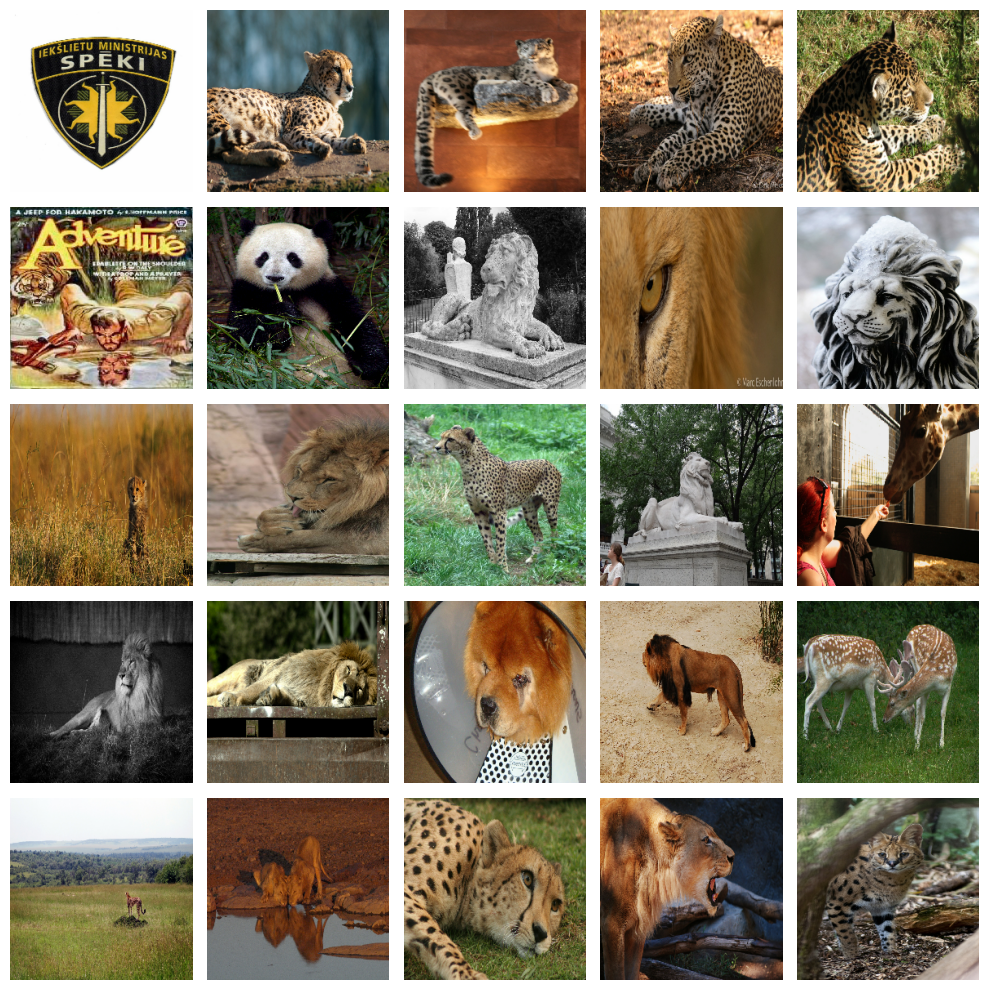

In [8]:
images = next(iter(train_data.take(1)))[0]

keras_cv.visualization.plot_image_gallery(images,rows=5,cols=5, value_range=(0, 255),show=True)

In [9]:
# import tensorflow as tf
# import keras_cv

# # Load the pre-trained model with ImageNet weights
# base_model = keras_cv.models.ImageClassifier.from_preset(
#     "efficientnetv2_b0_imagenet", num_classes=2
# )

# # Freeze the base model layers to prevent training them
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom classifier layers
# model = tf.keras.Sequential([
#     base_model,  # The pre-trained DenseNet169 model
#     tf.keras.layers.Dense(2, activation='softmax')  # Custom classifier for 2 classes
# ])

# # Compile the model with the chosen loss function, optimizer, and metrics
# model.compile(
#     loss="sparse_categorical_crossentropy",
#     optimizer=tf.keras.optimizers.AdamW(),
#     metrics=["accuracy"],
# )

# # Summary of the model architecture
# model.summary()


In [10]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet", num_classes=2
)
model.compile(
    loss="sparse_categorical_crossentropy",
    # optimizer=tf.optimizers.SGD(learning_rate=0.01),
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [11]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

Epoch 1/10


I0000 00:00:1732369902.322005    2351 service.cc:145] XLA service 0x7e427c0054f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732369902.322047    2351 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1732369962.656843    2351 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_13', 40 bytes spill stores, 80 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1732369962.746649    2351 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 164s 16s/step - accuracy: 0.6039 - loss: 0.6516 - val_accuracy: 0.8500 - val_loss: 0.3967
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9775 - loss: 0.2285 - val_accuracy: 0.9333 - val_loss: 0.1962
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.9922 - loss: 0.1117 - val_accuracy: 0.9000 - val_loss: 0.2014
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9894 - loss: 0.0561 - val_accuracy: 0.9167 - val_loss: 0.2717
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0348 - val_accuracy: 0.8833 - val_loss: 0.2817
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9963 - loss: 0.0138 - val_accuracy: 0.8500 - val_loss: 0.2940
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8500 - val_loss: 0.3742
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9861 - loss: 0.0209 - val_accuracy: 0.8500 - val_loss: 0.4174
Epo

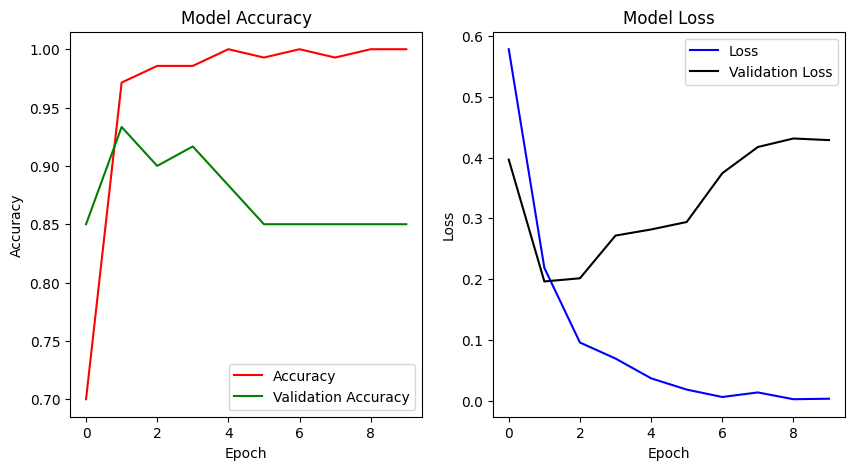

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First subplot for accuracy
ax[0].plot(history.history['accuracy'], label="Accuracy", color="red")
ax[0].plot(history.history['val_accuracy'], label="Validation Accuracy", color="green")
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

# Second subplot for loss
ax[1].plot(history.history['loss'], label="Loss", color="blue")
ax[1].plot(history.history['val_loss'], label="Validation Loss", color="black")
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

plt.show()


In [13]:
pred=model.predict(val_data)
final_pred=np.argmax(pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step


In [14]:
true_labels = []

# Iterate over the validation dataset
for batch in val_data:
    images, labels = batch  # Extract images and labels from the batch
    true_labels.extend(labels.numpy())  # Convert labels to numpy array




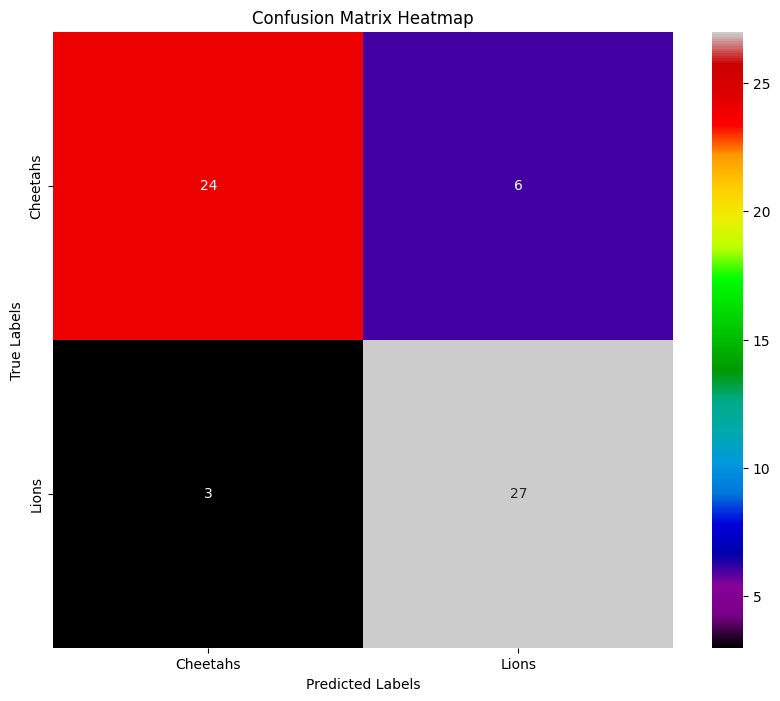

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_data= true_labels
plt.figure(figsize=(10,8))
label_name=['Cheetahs', 'Lions']
cm = confusion_matrix(true_data, final_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="nipy_spectral", xticklabels=label_name, 
            yticklabels=label_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [16]:
report = classification_report(true_labels,final_pred, target_names=label_name)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Cheetahs       0.89      0.80      0.84        30
       Lions       0.82      0.90      0.86        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


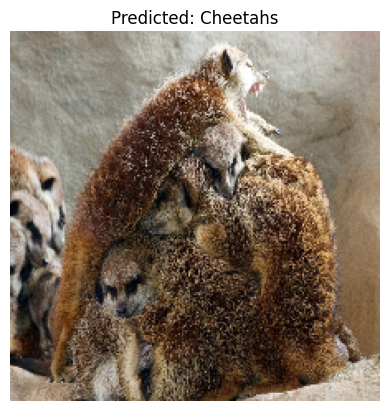

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Example: Replace 'path_to_image' with the path to your custom image
custom_image_path = '/kaggle/working/images/Cheetahs/00707659aba29334.jpg'

# Load and preprocess the custom image
img = image.load_img(custom_image_path, target_size=(224, 224))  # Resize to the expected input size
img_array = image.img_to_array(img)  # Convert image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if needed (adjust according to your model's preprocessing)

# Make predictions with the trained model
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# If you have a list of class names (example below), map the predicted class index to the class name
class_names = ['Cheetahs', 'Lions']  # Replace with your actual class names
predicted_class_name = class_names[predicted_class]

# Display the image and the prediction result
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


